In [26]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout

In [27]:
data = pd.read_csv('data.csv')

df_lon = data[[ , 'Lon']]

df_lat = data[['Lat']]

In [35]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(trainX, trainY)

reg.score(testX,testY)

0.19102060430472534

In [29]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(trainX, trainY)
reg.score(testX, testY)

0.19071077275733328

In [24]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [28]:
for day in range(1,8):
    numpy.random.seed(1453)
    # load the dataset
    dataframe = df_lat
    dataset = dataframe.values
    dataset = dataset.astype('float32')
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    train_size = int(len(dataset) * 0.60)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    
    look_back = 10
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(5, input_shape = (1, look_back)) ) # LSTM network with 5 neurons and a specified input structure
    model.add(Dropout(0.1)) # it used to avoid overfitting
    model.add(Dense(1)) # the number of neurons at the end of the network since we want one value from the network
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0) # batch size limits the number of samples to be shown to the network before a weight update can be performed
    # make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    # calculate root mean squared error
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    #start the prediction of the next day
    window = list()
    window = list(dataset[len(dataset)-look_back: len(dataset), 0]) 
    for i in range(145):
        magic = []
        magic.append(window[i:look_back+i])
        magic = numpy.reshape(magic, (1,1,look_back))
        val = model.predict(magic)
        window.append(val[0][0])
            
    window = scaler.inverse_transform(numpy.reshape(window, (-1,1)))
    
    df_new_day = pd.DataFrame({'Lat' : window[:,0]})
    df_lat = df_lat.append(df_new_day, ignore_index=True)


Test Score: 2.43 RMSE
2
Test Score: 1.04 RMSE
2
Test Score: 3.13 RMSE
2
Test Score: 2.99 RMSE
2
Test Score: 2.93 RMSE
2
Test Score: 2.65 RMSE
2
Test Score: 2.11 RMSE
2


In [29]:
df_lat.to_csv('Latitute_ALL_DAYS.csv')
df_lon.to_csv('Lontitute_ALL_DAYS.csv')

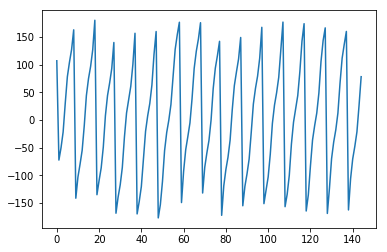

In [11]:
plt.plot(df_lon['Lon'])